In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics

In [2]:
df = pd.read_csv("seeds.csv")

In [3]:
df.shape

(210, 8)

In [4]:
df.head()

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [7]:
df2 = df.drop('target',axis=1)

In [8]:
df2.head()

,A,P,C,LK,WK,A_Coef,LKG
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [10]:
from sklearn.cluster import KMeans

km = KMeans()

wcss = []

for k in range(1,10):
    km = KMeans(n_clusters = k)
    km.fit(df2)
    wcss.append(km.inertia_)

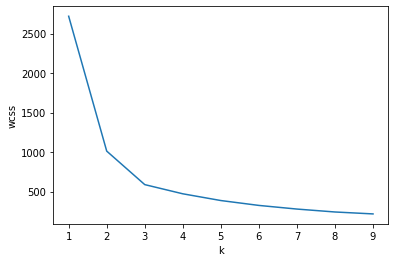

In [11]:
plt.plot(range(1,10), wcss)
plt.xlabel('k')
plt.ylabel('wcss')
plt.show()

In [12]:
km = KMeans(n_clusters=3)

km.fit(df2)

KMeans(n_clusters=3)

In [13]:
centers = km.cluster_centers_
centers

array([[11.96441558, 13.27480519,  0.8522    ,  5.22928571,  2.87292208,
         4.75974026,  5.08851948],
       [18.72180328, 16.29737705,  0.88508689,  6.20893443,  3.72267213,
         3.60359016,  6.06609836],
       [14.64847222, 14.46041667,  0.87916667,  5.56377778,  3.27790278,
         2.64893333,  5.19231944]])

In [14]:
df['pred_labels'] = km.labels_

In [15]:
df.head()

,A,P,C,LK,WK,A_Coef,LKG,target,pred_labels
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0,2
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0,2
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0,2
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0,2
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0,2


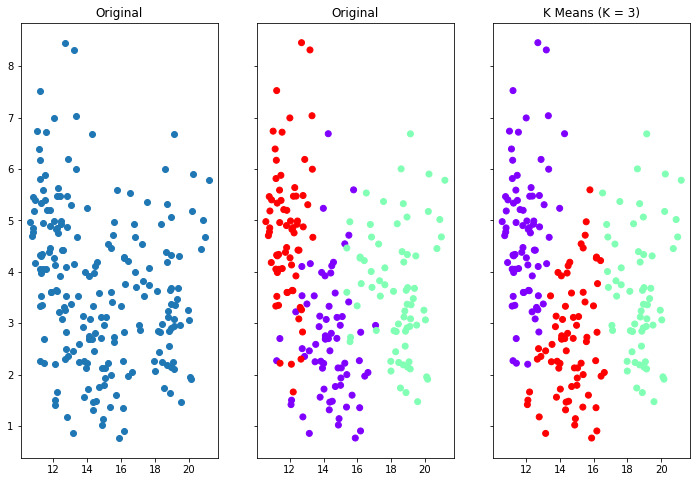

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (12,8) )

ax1.set_title("Original")
ax1.scatter(x = df['A'], y = df['A_Coef'])

# For original data 
ax2.set_title("Original")
ax2.scatter(x = df['A'], y = df['A_Coef'], c = df['target'], cmap='rainbow')

# For fitted with kmeans 
ax3.set_title('K Means (K = 3)')
ax3.scatter(x = df['A'], y = df['A_Coef'], c = df['pred_labels'], cmap='rainbow')
#ax1.scatter(x=centers[:, 0], y=centers[:, 5], c='black',s=300, alpha=0.5);

